N valid RTs: 500
Initial guess: muR=1.241, deltaS=2.004

Fitting results:
  muR = 4.984
  deltaS = 2.004
  Negative log-likelihood = 361.973


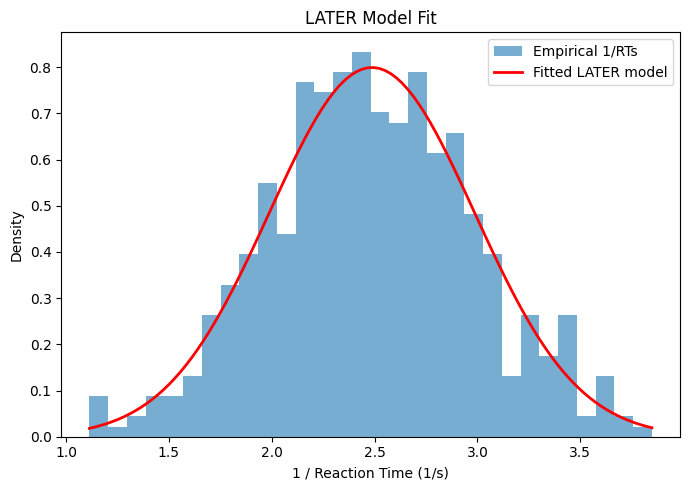

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

# ================================================================
# 1. Get the data
# ================================================================
# In MATLAB, later_getData() loads cleaned RTs. 
# We'll simulate similar data here for demonstration.
# (Replace this with your real RT array if you have one.)
np.random.seed(0)
true_muR = 5.0      # true LATER parameter
true_deltaS = 2.0   # true LATER parameter

# Generate synthetic RTs from the model
mu = true_muR / true_deltaS
sigma = 1 / true_deltaS
invRTs = np.random.normal(mu, sigma, 500)  # 500 trials
RTs = 1 / invRTs[invRTs > 0]               # remove invalid negative rates
print(f"N valid RTs: {len(RTs)}")

# ================================================================
# 2. Define the objective function
# ================================================================
def later_neg_log_likelihood(params, RTs):
    """
    Negative log-likelihood for the LATER model.
    params: [muR, deltaS]
    RTs: array of reaction times
    """
    muR, deltaS = params
    if muR <= 0 or deltaS <= 0:  # invalid parameter region
        return np.inf

    invRTs = 1.0 / RTs
    mu = muR / deltaS
    sigma = 1.0 / deltaS

    logpdf = norm.logpdf(invRTs, loc=mu, scale=sigma)
    nll = -np.sum(logpdf)
    return nll

# ================================================================
# 3. Define initial conditions and bounds
# ================================================================
invRTs = 1.0 / RTs
mu_guess = np.mean(invRTs)
sd_guess = np.std(invRTs)
deltaS_guess = 1.0 / sd_guess
muR_guess = mu_guess / deltaS_guess

initial_values = np.array([muR_guess, deltaS_guess])
bounds = [(1e-3, 1000), (1e-3, 1000)]

print(f"Initial guess: muR={initial_values[0]:.3f}, deltaS={initial_values[1]:.3f}")

# ================================================================
# 4. Run the fit
# ================================================================
result = minimize(later_neg_log_likelihood,
                  x0=initial_values,
                  args=(RTs,),
                  bounds=bounds,
                  method='L-BFGS-B',
                  options={'maxiter': 3000})

fitted_muR, fitted_deltaS = result.x
print("\nFitting results:")
print(f"  muR = {fitted_muR:.3f}")
print(f"  deltaS = {fitted_deltaS:.3f}")
print(f"  Negative log-likelihood = {result.fun:.3f}")

# ================================================================
# 5. Evaluate and visualize the fits
# ================================================================
mu_fit = fitted_muR / fitted_deltaS
sigma_fit = 1.0 / fitted_deltaS

x = np.linspace(min(1/RTs), max(1/RTs), 100)
y = norm.pdf(x, loc=mu_fit, scale=sigma_fit)

plt.figure(figsize=(7,5))
plt.hist(1/RTs, bins=30, density=True, alpha=0.6, label="Empirical 1/RTs")
plt.plot(x, y, 'r-', lw=2, label="Fitted LATER model")
plt.xlabel("1 / Reaction Time (1/s)")
plt.ylabel("Density")
plt.title("LATER Model Fit")
plt.legend()
plt.tight_layout()
plt.show()

#You know you got a reasonable fit if the optimized parameters (μR and ΔS) are positive and within a plausible range given your data. The fitted Gaussian in 1/RT space should closely match the empirical distribution of 1/RTs. Additionally, simulating RTs from the fitted parameters should produce a distribution similar to the observed RTs, indicating the model can reproduce the data.
